# Mukesh Kumar Sanodiya (05-Apr-2019)

# 24.PROJECT-4 APPLICATION OF CLASSIFICATION MODELS
## Problem Statement
This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html Donor: Ronny Kohavi and Barry Becker, Data Mining and Visualization Silicon Graphics. e-mail: ronnyk@sgi.com for questions. Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random). 48842 instances, mix of continuous and discrete (train=32561, test=16281) 45222 if instances with unknown values are removed (train=30162, test=15060) Duplicate or conflicting instances : 6 Class probabilities for adult.all file Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to determine whether a person makes over 50K a year. Conversion of original data as follows:

Discretized a gross income into two ranges with threshold 50,000. Convert U.S. to US to avoid periods. Convert Unknown to "?" Run MLC++ GenCVFiles to generate data,test. Description of fnlwgt (final weight) The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are: A single cell estimate of the population 16+ for each state. Controls for Hispanic Origin by age and sex. Controls by Race, age and sex. We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Dataset Link¶
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
import pandas as pd 
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import scipy as sp
import IPython
from IPython import display
import sklearn 
import random
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [22]:
raw_train = pd.read_csv('adult.data', header=None, index_col = False, names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','result'] )
raw_test = pd.read_csv('adult.test', header=None, index_col = False, names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','result'],skiprows=1)


In [23]:
train = raw_train.copy(deep = True)
test = raw_test.copy(deep = True)

In [24]:
raw_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
raw_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [26]:
train['education'] = train['education'].map({' Bachelors':1, ' HS-grad':2, ' Masters':3, ' 9th':4, ' 11th':5, ' Some-college':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' 7th-8th':9, ' Doctorate':10, ' Prof-school':12, ' 5th-6th':11, ' 10th':13, ' 1st-4th':14, ' Preschool':15, ' 12th':16}).astype(int)
train['workclass'] = train['workclass'].map({' Private':4, ' Local-gov':7, ' Self-emp-not-inc':6, ' Federal-gov':8, ' State-gov':5, ' Self-emp-inc':9, ' Without-pay':1, ' Never-worked':2, ' ?':3}).astype(int)
train['marital-status'] = train['marital-status'].map({' Never-married':1, ' Married-civ-spouse':2, ' Widowed':3, ' Divorced':4, ' Separated':5, ' Married-spouse-absent':6, ' Married-AF-spouse':7}).astype(int)
train['relationship'] = train['relationship'].map({' Own-child':1, ' Husband':2, ' Not-in-family':3, ' Unmarried':4, ' Wife':5, ' Other-relative':6}).astype(int)
train['race'] = train['race'].map({' Black':1, ' White':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4, ' Other':5}).astype(int)
train['sex'] = train['sex'].map({' Male':1, ' Female':2}).astype(int)
train['occupation'] = train['occupation'].map({' Machine-op-inspct':1, ' Farming-fishing':2, ' Protective-serv':3, ' Other-service':4, ' Prof-specialty':5, ' Craft-repair':6, ' Adm-clerical':7, ' Exec-managerial':8, ' Tech-support':9, ' Sales':10, ' Priv-house-serv':11, ' Transport-moving':12, ' Handlers-cleaners':13, ' Armed-Forces':14, ' ?':15}).astype(int)
train['result'] = train['result'].map({' <=50K':1, ' >50K':2}).astype(int)
train['native-country'] = train['native-country'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' ?':5, ' Mexico':6, ' South':7, ' Puerto-Rico':8, ' Honduras':9, ' England':10, ' Canada':11, ' Germany':12, ' Iran':13, ' Philippines':14, ' Italy':15, ' Poland':16, ' Columbia':17, ' Cambodia':18, ' Thailand':19, ' Ecuador':20, ' Laos':21, ' Taiwan':22, ' Haiti':23, ' Portugal':24, ' Dominican-Republic':25, ' El-Salvador':26, ' France':27, ' Guatemala':28, ' China':29, ' Japan':30, ' Yugoslavia':31, ' Peru':32, ' Outlying-US(Guam-USVI-etc)':33, ' Scotland':34, ' Trinadad&Tobago':35, ' Greece':36, ' Nicaragua':37, ' Vietnam':38, ' Hong':39, ' Ireland':40, ' Hungary':41, ' Holand-Netherlands':42}).astype(int) 


In [27]:
test['education'] = test['education'].map({' Bachelors':1, ' HS-grad':2, ' Masters':3, ' 9th':4, ' 11th':5, ' Some-college':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' 7th-8th':9, ' Doctorate':10, ' Prof-school':12, ' 5th-6th':11, ' 10th':13, ' 1st-4th':14, ' Preschool':15, ' 12th':16}).astype(int)
test['workclass'] = test['workclass'].map({' Private':4, ' Local-gov':7, ' Self-emp-not-inc':6, ' Federal-gov':8, ' State-gov':5, ' Self-emp-inc':9, ' Without-pay':1, ' Never-worked':2, ' ?':3}).astype(int)
test['marital-status'] = test['marital-status'].map({' Never-married':1, ' Married-civ-spouse':2, ' Widowed':3, ' Divorced':4, ' Separated':5, ' Married-spouse-absent':6, ' Married-AF-spouse':7}).astype(int)
test['relationship'] = test['relationship'].map({' Own-child':1, ' Husband':2, ' Not-in-family':3, ' Unmarried':4, ' Wife':5, ' Other-relative':6}).astype(int)
test['race'] = test['race'].map({' Black':1, ' White':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4, ' Other':5}).astype(int)
test['sex'] = test['sex'].map({' Male':1, ' Female':2}).astype(int)
test['occupation'] = test['occupation'].map({' Machine-op-inspct':1, ' Farming-fishing':2, ' Protective-serv':3, ' Other-service':4, ' Prof-specialty':5, ' Craft-repair':6, ' Adm-clerical':7, ' Exec-managerial':8, ' Tech-support':9, ' Sales':10, ' Priv-house-serv':11, ' Transport-moving':12, ' Handlers-cleaners':13, ' Armed-Forces':14, ' ?':15}).astype(int)
test['result'] = test['result'].map({' <=50K.':1, ' >50K.':2}).astype(int)
test['native-country'] = test['native-country'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' ?':5, ' Mexico':6, ' South':7, ' Puerto-Rico':8, ' Honduras':9, ' England':10, ' Canada':11, ' Germany':12, ' Iran':13, ' Philippines':14, ' Italy':15, ' Poland':16, ' Columbia':17, ' Cambodia':18, ' Thailand':19, ' Ecuador':20, ' Laos':21, ' Taiwan':22, ' Haiti':23, ' Portugal':24, ' Dominican-Republic':25, ' El-Salvador':26, ' France':27, ' Guatemala':28, ' China':29, ' Japan':30, ' Yugoslavia':31, ' Peru':32, ' Outlying-US(Guam-USVI-etc)':33, ' Scotland':34, ' Trinadad&Tobago':35, ' Greece':36, ' Nicaragua':37, ' Vietnam':38, ' Hong':39, ' Ireland':40, ' Hungary':41}).astype(int) 


In [28]:
age = [train['result'][train['age'].between(0,20)].mean(),
train['result'][train['age'].between(20,25)].mean(),
train['result'][train['age'].between(25,30)].mean(),
train['result'][train['age'].between(30,35)].mean(),
train['result'][train['age'].between(35,40)].mean(),
train['result'][train['age'].between(40,45)].mean(),
train['result'][train['age'].between(45,50)].mean(),
train['result'][train['age'].between(50,55)].mean(),
train['result'][train['age'].between(55,60)].mean(),
train['result'][train['age'].between(60,70)].mean(),
train['result'][train['age'].between(70,120)].mean()]
age_x = [18,22,27,33,38,42,47,53,57,65,80]

y=0.003899x+1.069675


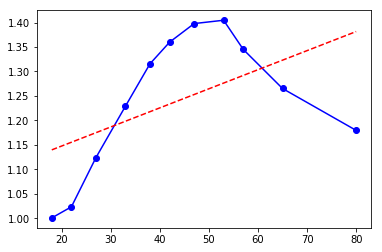

In [29]:
plt.plot(age_x, age, 'bo', ls = '-')
z = np.polyfit(age_x, age,1)
p = np.poly1d(z)
plt.plot(age_x,p(age_x),"r--")
print("y=%.6fx+%.6f"%(z[0],z[1]))

In [30]:
train['age'] = np.where(train['age'].between(0,30), 0, train['age'])
train['age'] = np.where(train['age'].between(75,100), 0, train['age'])
train['age'] = np.where(train['age'].between(30,40), 1, train['age'])
train['age'] = np.where(train['age'].between(60,75), 1, train['age'])
train['age'] = np.where(train['age'].between(40,60), 2, train['age'])
test['age'] = np.where(test['age'].between(0,30), 0, test['age'])
test['age'] = np.where(test['age'].between(75,100), 0, test['age'])
test['age'] = np.where(test['age'].between(30,40), 1, test['age'])
test['age'] = np.where(test['age'].between(60,75), 1, test['age'])
test['age'] = np.where(test['age'].between(40,60), 2, test['age'])

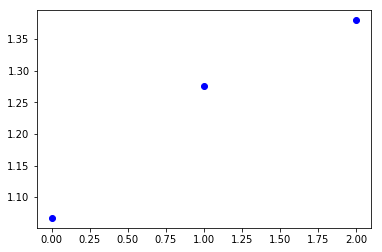

In [31]:
age = [train['result'][train['age'] == 0].mean(),
train['result'][train['age'] == 1].mean(),
train['result'][train['age'] == 2].mean()]
age_x = [0,1,2]
plt.plot(age_x, age, 'bo')

In [32]:
# 2b. Relatioship visualisation and grouping

# In[11]:


rel = [train['result'][train['relationship'] == 1].mean(),
train['result'][train['relationship'] == 2].mean(),
train['result'][train['relationship'] == 3].mean(),
train['result'][train['relationship'] == 4].mean(),
train['result'][train['relationship'] == 5].mean(),
train['result'][train['relationship'] == 6].mean()]
rel_x = [1,2,3,4,5,6]

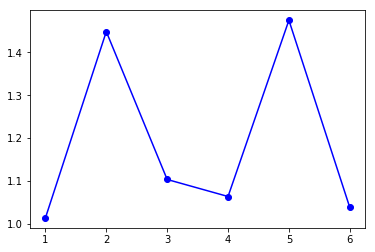

In [33]:
plt.plot(rel_x, rel, 'bo', ls = '-')

In [34]:
train['relationship'].replace(to_replace = [1,3,4,6], value = 0, inplace = True)
train['relationship'].replace(to_replace = [2,5], value = 1, inplace = True)
test['relationship'].replace(to_replace = [1,3,4,6], value = 0, inplace = True)
test['relationship'].replace(to_replace = [2,5], value = 1, inplace = True)

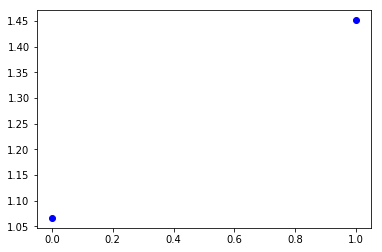

In [35]:
rel = [train['result'][train['relationship'] == 0].mean(),
train['result'][train['relationship'] == 1].mean()]
rel_x = [0,1]
plt.plot(rel_x, rel, 'bo')

In [36]:
work = [train['result'][train['workclass'] == 1].mean(),
train['result'][train['workclass'] == 2].mean(),
train['result'][train['workclass'] == 3].mean(),
train['result'][train['workclass'] == 4].mean(),
train['result'][train['workclass'] == 5].mean(),
train['result'][train['workclass'] == 6].mean(),
train['result'][train['workclass'] == 7].mean(),
train['result'][train['workclass'] == 8].mean(),
train['result'][train['workclass'] == 9].mean()]
work_x = [1,2,3,4,5,6,7,8,9]

y=0.063942x+0.915642


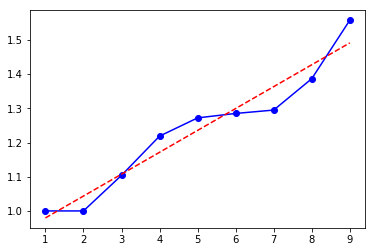

In [37]:
plt.plot(work_x, work, 'bo', ls = '-', label = 'wiek')
z = np.polyfit(work_x, work,1)
p = np.poly1d(z)
plt.plot(work_x,p(work_x),"r--")
print("y=%.6fx+%.6f"%(z[0],z[1]))

In [38]:
train['workclass'].replace(to_replace = [1,2,3], value = 0, inplace = True)
train['workclass'].replace(to_replace = [4,5,6,7], value = 1, inplace = True)
test['workclass'].replace(to_replace = [1,2,3], value = 0, inplace = True)
test['workclass'].replace(to_replace = [4,5,6,7], value = 1, inplace = True)

y=0.039753x+1.140910


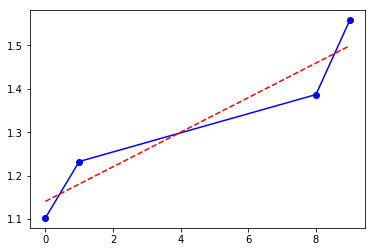

In [39]:
work = [train['result'][train['workclass'] == 0].mean(),
train['result'][train['workclass'] == 1].mean(),
train['result'][train['workclass'] == 8].mean(),
train['result'][train['workclass'] == 9].mean()]
work_x = [0,1,8,9]
plt.plot(work_x, work, 'bo', ls = '-')
z = np.polyfit(work_x, work,1)
p = np.poly1d(z)
plt.plot(work_x,p(work_x),"r--")
print("y=%.6fx+%.6f"%(z[0],z[1]))

In [40]:
edu = [train['result'][train['education-num'] == 1].mean(),
train['result'][train['education-num'] == 2].mean(),
train['result'][train['education-num'] == 3].mean(),
train['result'][train['education-num'] == 4].mean(),
train['result'][train['education-num'] == 5].mean(),
train['result'][train['education-num'] == 6].mean(),
train['result'][train['education-num'] == 7].mean(),
train['result'][train['education-num'] == 8].mean(),
train['result'][train['education-num'] == 9].mean(),
train['result'][train['education-num'] == 10].mean(),
train['result'][train['education-num'] == 11].mean(),
train['result'][train['education-num'] == 12].mean(),
train['result'][train['education-num'] == 13].mean(),
train['result'][train['education-num'] == 14].mean(),
train['result'][train['education-num'] == 15].mean(),
train['result'][train['education-num'] == 16].mean()]
edu_x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

y=0.046781x+0.833478


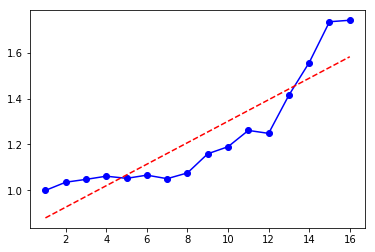

In [41]:
plt.plot(edu_x, edu, 'bo', ls = '-')
z = np.polyfit(edu_x, edu,1)
p = np.poly1d(z)
plt.plot(edu_x,p(edu_x),"r--")
print("y=%.6fx+%.6f"%(z[0],z[1]))

In [42]:
train['education-num'].replace(to_replace = [1,2,3,4,5,6,7,8], value = 0, inplace = True)
train['education-num'].replace(to_replace = [9,10,11,12], value = 1, inplace = True)
train['education-num'].replace(to_replace = 16, value = 15, inplace = True)
test['education-num'].replace(to_replace = [1,2,3,4,5,6,7,8], value = 0, inplace = True)
test['education-num'].replace(to_replace = [9,10,11,12], value = 1, inplace = True)
test['education-num'].replace(to_replace = 16, value = 15, inplace = True)

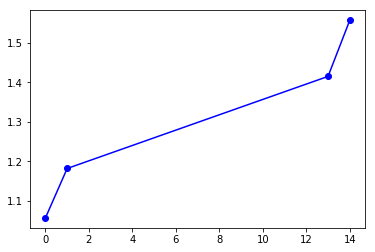

In [43]:
edu = [train['result'][train['education-num'] == 0].mean(),
train['result'][train['education-num'] == 1].mean(),
train['result'][train['education-num'] == 13].mean(),
train['result'][train['education-num'] == 14].mean(),
train['result'][train['education-num'] == 16].mean()]
edu_x = [0,1,13,14,16]
plt.plot(edu_x, edu, 'bo', ls = '-')

In [44]:
# Martial status visualisation and grouping




mar = [train['result'][train['marital-status'] == 1].mean(),
train['result'][train['marital-status'] == 2].mean(),
train['result'][train['marital-status'] == 3].mean(),
train['result'][train['marital-status'] == 4].mean(),
train['result'][train['marital-status'] == 5].mean(),
train['result'][train['marital-status'] == 6].mean(),
train['result'][train['marital-status'] == 7].mean()]
mar_x = [1,2,3,4,5,6,7]

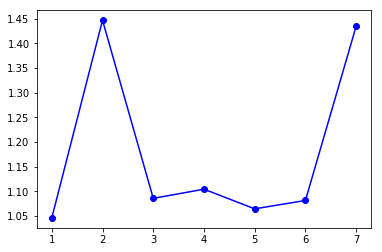

In [45]:

plt.plot(mar_x, mar, 'bo', ls = '-')

In [46]:
train['marital-status'].replace(to_replace = [1,3,4,5,6], value = 0, inplace = True)
train['marital-status'].replace(to_replace = [2,7], value = 1, inplace = True)
test['marital-status'].replace(to_replace = [1,3,4,5,6], value = 0, inplace = True)
test['marital-status'].replace(to_replace = [2,7], value = 1, inplace = True)





mar = [train['result'][train['marital-status'] == 0].mean(),
train['result'][train['marital-status'] == 1].mean()]
mar_x = [0,1]

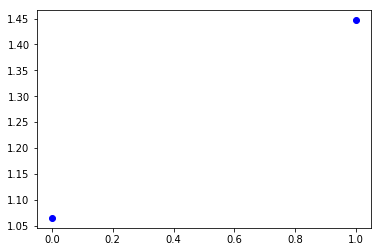

In [47]:
plt.plot(mar_x, mar, 'bo')

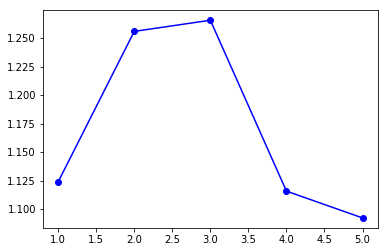

In [48]:
# Race visualisation and grouping



race = [train['result'][train['race'] == 1].mean(),
train['result'][train['race'] == 2].mean(),
train['result'][train['race'] == 3].mean(),
train['result'][train['race'] == 4].mean(),
train['result'][train['race'] == 5].mean()]
race_x = [1,2,3,4,5]
plt.plot(race_x, race, 'bo', ls = '-')



train['race'].replace(to_replace = [1,4,5], value = 0, inplace = True)
train['race'].replace(to_replace = [2,3], value = 1, inplace = True)
test['race'].replace(to_replace = [1,4,5], value = 0, inplace = True)
test['race'].replace(to_replace = [2,3], value = 1, inplace = True)

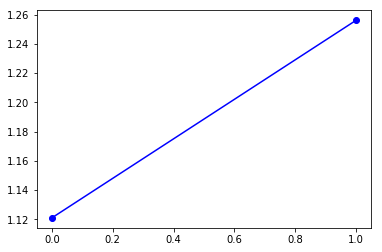

In [49]:
race = [train['result'][train['race'] == 0].mean(),
train['result'][train['race'] == 1].mean()]
race_x = [0,1]
plt.plot(race_x, race, 'bo', ls = '-')

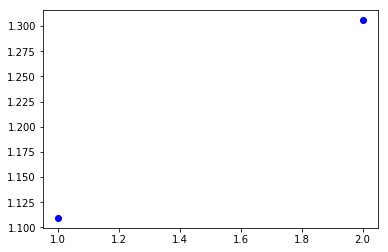

In [52]:
# Sex visualisation and grouping


sex = [train['result'][train['sex'] == 1].mean(),
train['result'][train['sex'] == 2].mean()]
sex_x = [2,1]
plt.plot(sex_x, sex, 'bo')








In [53]:
# 2h. Native country visualisation and grouping
train['native-country'].replace(to_replace = [1,33], value = 0, inplace = True)
train['native-country'].replace(to_replace = [2,3,4,5,6,7,8,9,14,17,18,19,20,21,22,23,25,26,28,29,31,32,35,36,37,38], value = 1, inplace = True)
train['native-country'].replace(to_replace = [15,16,24,34,40,41], value = 2, inplace = True)
train['native-country'].replace(to_replace = [10,11,12,13,27,30,39,42], value = 3, inplace = True)
test['native-country'].replace(to_replace = [1,33], value = 0, inplace = True)
test['native-country'].replace(to_replace = [2,3,4,5,6,7,8,9,14,17,18,19,20,21,22,23,25,26,28,29,31,32,35,36,37,38], value = 1, inplace = True)
test['native-country'].replace(to_replace = [15,16,24,34,40,41], value = 2, inplace = True)
test['native-country'].replace(to_replace = [10,11,12,13,27,30,39], value = 3, inplace = True)

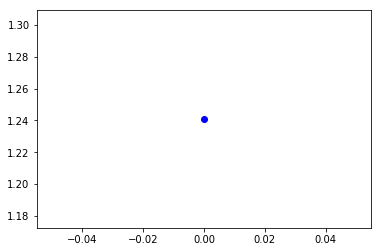

In [54]:
nation = [train['result'][train['native-country'] == 0].mean(),
train['result'][train['native-country'] == 1].mean(),
train['result'][train['native-country'] == 2].mean(),
train['result'][train['native-country'] == 3].mean()]
nation_x = [0,1,2,3]
plt.plot(nation_x, nation, 'bo')

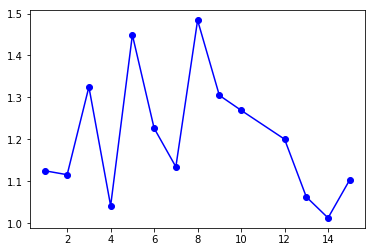

In [55]:
# Occupation visualisation and grouping

train['occupation'].replace(to_replace = 11, value = 14, inplace = True)

test['occupation'].replace(to_replace = 11, value = 14, inplace = True)

ocup = [train['result'][train['occupation'] == 1].mean(),
train['result'][train['occupation'] == 2].mean(),
train['result'][train['occupation'] == 3].mean(),
train['result'][train['occupation'] == 4].mean(),
train['result'][train['occupation'] == 5].mean(),
train['result'][train['occupation'] == 6].mean(),
train['result'][train['occupation'] == 7].mean(),
train['result'][train['occupation'] == 8].mean(),
train['result'][train['occupation'] == 9].mean(),
train['result'][train['occupation'] == 10].mean(),
train['result'][train['occupation'] == 12].mean(),
train['result'][train['occupation'] == 13].mean(),
train['result'][train['occupation'] == 14].mean(),
train['result'][train['occupation'] == 15].mean()]
ocup_x = [1,2,3,4,5,6,7,8,9,10,12,13,14,15]


plt.plot(ocup_x, ocup, 'bo', ls = '-')

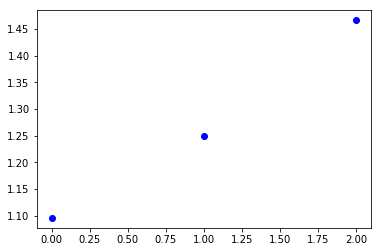

In [56]:
train['occupation'].replace(to_replace = [1,2,4,7,13,14,15], value = 0, inplace = True)
test['occupation'].replace(to_replace = [1,2,4,7,13,14,15], value = 0, inplace = True)
train['occupation'].replace(to_replace = [3,6,9,10,12], value = 1, inplace = True)
test['occupation'].replace(to_replace = [3,6,9,10,12], value = 1, inplace = True)
train['occupation'].replace(to_replace = [5,8], value = 2, inplace = True)
test['occupation'].replace(to_replace = [5,8], value = 2, inplace = True)

ocup = [train['result'][train['occupation'] == 0].mean(),
train['result'][train['occupation'] == 1].mean(),
train['result'][train['occupation'] == 2].mean()]
ocup_x = [0,1,2]
plt.plot(ocup_x, ocup, 'bo')

In [58]:
# Hours per week visualisation and grouping

train['hoursBIN'] = pd.cut(train['hours-per-week'],10)
train[['hoursBIN','result']].groupby(train['hoursBIN'], as_index = True).mean()


train.drop(['hoursBIN'], axis = 1, inplace = True)


train['hours-per-week'] = np.where(train['hours-per-week'].between(0,30), 0, train['hours-per-week'])
train['hours-per-week'] = np.where(train['hours-per-week'].between(30,40), 1, train['hours-per-week'])
train['hours-per-week'] = np.where(train['hours-per-week'].between(90,100), 1, train['hours-per-week'])
train['hours-per-week'] = np.where(train['hours-per-week'].between(40,90), 2, train['hours-per-week'])
test['hours-per-week'] = np.where(test['hours-per-week'].between(0,30), 0, test['hours-per-week'])
test['hours-per-week'] = np.where(test['hours-per-week'].between(30,40), 1, test['hours-per-week'])
test['hours-per-week'] = np.where(test['hours-per-week'].between(90,100), 1, test['hours-per-week'])
test['hours-per-week'] = np.where(test['hours-per-week'].between(40,90), 2, test['hours-per-week'])

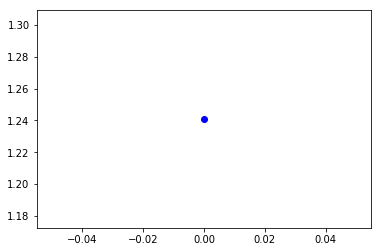

In [59]:
hour = [train['result'][train['hours-per-week'] == 0].mean(),
train['result'][train['hours-per-week'] == 1].mean(),
train['result'][train['hours-per-week'] == 2].mean()]
hour_x = [0,1,2]
plt.plot(hour_x, hour, 'bo')

In [60]:

# Capital gain visualisation and grouping

train['capital-gain'] = np.where(train['capital-gain'].between(0,4000), 0, train['capital-gain'])
train['capital-gain'] = np.where(train['capital-gain'].between(4000,8000), 1, train['capital-gain'])
train['capital-gain'] = np.where(train['capital-gain'].between(8000,1000000), 2, train['capital-gain'])
test['capital-gain'] = np.where(test['capital-gain'].between(0,4000), 0, test['capital-gain'])
test['capital-gain'] = np.where(test['capital-gain'].between(4000,8000), 1, test['capital-gain'])
test['capital-gain'] = np.where(test['capital-gain'].between(8000,1000000), 2, test['capital-gain'])

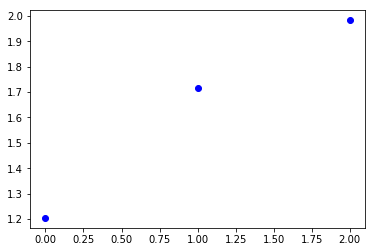

In [61]:
gain = [train['result'][train['capital-gain'] == 0].mean(),
train['result'][train['capital-gain'] == 1].mean(),
train['result'][train['capital-gain'] == 2].mean()]
gain_x = [0,1,2]
plt.plot(gain_x, gain, 'bo')

In [62]:
# Capital loss visualisation and grouping

train['capital-loss'] = np.where(train['capital-loss'].between(0,1400), 0, train['capital-loss'])
train['capital-loss'] = np.where(train['capital-loss'].between(1400,2700), 1, train['capital-loss'])
train['capital-loss'] = np.where(train['capital-loss'].between(2700,1000000), 2, train['capital-loss'])
test['capital-loss'] = np.where(test['capital-loss'].between(0,1400), 0, test['capital-loss'])
test['capital-loss'] = np.where(test['capital-loss'].between(1400,2700), 1, test['capital-loss'])
test['capital-loss'] = np.where(test['capital-loss'].between(2700,1000000), 2, test['capital-loss'])

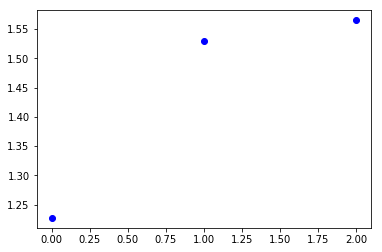

In [63]:
loss = [train['result'][train['capital-loss'] == 0].mean(),
train['result'][train['capital-loss'] == 1].mean(),
train['result'][train['capital-loss'] == 2].mean()]
loss_x = [0,1,2]
plt.plot(loss_x, loss, 'bo')

In [64]:
# Preparing data for model

trainY = train['result']
testY = test['result']

trainX = train.drop(['result'], axis = 1)
testX = test.drop(['result'], axis = 1)

In [65]:
trainX.drop(['fnlwgt'], axis = 1, inplace = True)
testX.drop(['fnlwgt'], axis = 1, inplace = True)


trainX.drop(['education'], axis = 1, inplace = True)


In [66]:
testX.drop(['education'], axis = 1, inplace = True)

In [67]:
#  To simplify model columns (race, sex and native country) are droped, as they don't have big influence. The range of mean result is between <1, 1.3>

trainX.drop(['race'], axis = 1, inplace = True)
trainX.drop(['native-country'], axis = 1, inplace = True)
trainX.drop(['sex'], axis = 1, inplace = True)
testX.drop(['race'], axis = 1, inplace = True)
testX.drop(['native-country'], axis = 1, inplace = True)
testX.drop(['sex'], axis = 1, inplace = True)

In [69]:
#Common Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [73]:

# # creating odd list of K for KNN
# myList = list(range(1,50))

# # subsetting just the odd ones
# neighbors = list(range(1,50,2))

# # empty list that will hold cv scores
# cv_scores = []

# # perform 10-fold cross validation
# for k in neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, trainX, trainY, cv=10, scoring='f1')
#     cv_scores.append(scores.mean())
    
# from sklearn.metrics import accuracy_score
# # changing to misclassification error
# MSE = [1 - x for x in cv_scores]

# # determining best k
# optimal_k = neighbors[MSE.index(min(MSE))]
# print("The optimal number of neighbors is %d" % optimal_k)

In [ ]:
# # plot misclassification error vs k
# plt.plot(neighbors, MSE)
# plt.xlabel('Number of Neighbors K')
# plt.ylabel('Misclassification Error')
# plt.show()

In [71]:
reglog = LogisticRegression()
reglog.fit(trainX, trainY)
Y_predLR = reglog.predict(testX)
acc_log = round(reglog.score(trainX, trainY) * 100, 2)
acc_log

knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(trainX, trainY)
Y_predKNN = knn.predict(testX)
acc_knn = round(knn.score(trainX, trainY) * 100, 2)
acc_knn

gaussian = GaussianNB()
gaussian.fit(trainX, trainY)
Y_predG = gaussian.predict(testX)
acc_gaussian = round(gaussian.score(trainX, trainY) * 100, 2)
acc_gaussian

perceptron = Perceptron()
perceptron.fit(trainX, trainY)
Y_predP = perceptron.predict(testX)
acc_perceptron = round(perceptron.score(trainX, trainY) * 100, 2)
acc_perceptron

svc = SVC()
svc.fit(trainX, trainY)
Y_pred = svc.predict(testX)
acc_svc = round(svc.score(trainX, trainY) * 100, 2)
acc_svc

linear_svc = LinearSVC()
linear_svc.fit(trainX, trainY)
Y_predLSVC = linear_svc.predict(testX)
acc_linear_svc = round(linear_svc.score(trainX, trainY) * 100, 2)
acc_linear_svc

sgd = SGDClassifier()
sgd.fit(trainX, trainY)
Y_predSGD = sgd.predict(testX)
acc_sgd = round(sgd.score(trainX, trainY) * 100, 2)
acc_sgd

decision_tree = DecisionTreeClassifier()
decision_tree.fit(trainX, trainY)
Y_predD = decision_tree.predict(testX)
acc_decision_tree = round(decision_tree.score(trainX, trainY) * 100, 2)
acc_decision_tree

random_forest = RandomForestClassifier(n_estimators=400, max_features = 'sqrt', oob_score = True, n_jobs = -1)
random_forest.fit(trainX, trainY)
Y_predRF = random_forest.predict(testX)
random_forest.score(trainX, trainY)
acc_random_forest = round(random_forest.score(trainX, trainY) * 100, 2)
acc_random_forest

85.58

In [72]:
print('LogisticRegression =', acc_log)
print('KNeighborsClassifier =', acc_knn)
print('GaussianNB =', acc_gaussian)
print('Perceptron =', acc_perceptron)
print('LinearSVC =', acc_linear_svc)
print('SVC =', acc_svc)
print('SGDClassifier =', acc_sgd)
print('DecisionTreeClassifier =', acc_decision_tree)
print('RandomForestClassifier =', acc_random_forest)

LogisticRegression = 85.0
KNeighborsClassifier = 85.08
GaussianNB = 83.05
Perceptron = 80.53
LinearSVC = 84.76
SVC = 85.11
SGDClassifier = 80.51
DecisionTreeClassifier = 85.58
RandomForestClassifier = 85.58
